# 주택월세종합지수

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
map_k = gpd.read_file("../../Documents/Data/map/TL_SCCO_CTPRVN.shp", encoding = 'euc-kr')
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/Hancom Gothic Regular.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [4]:
MR = pd.read_csv("../../Documents/Data/Project/유형별_주택월세통합가격지수.csv", encoding="utf-8", engine="python", index_col=0)
map_k = gpd.read_file("../../Documents/Data/map/TL_SCCO_CTPRVN.shp", encoding = 'euc-kr')
MR

,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],...,단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,100.6,...,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,100.8,...,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2
2015-08-01,100.3,99.6,100.9,100.4,101.0,99.9,99.5,99.2,99.7,101.0,...,100.1,101.5,99.6,99.3,100.4,100.3,100.8,98.3,100.4,100.2
2015-09-01,100.3,99.7,100.9,100.4,101.1,100.0,99.6,99.2,99.7,101.1,...,100.1,101.5,99.6,99.4,100.3,100.4,100.8,98.3,100.4,100.2
2015-10-01,100.4,99.8,101.0,100.5,101.2,100.1,99.6,99.3,99.8,101.2,...,100.2,101.3,99.7,99.3,100.4,100.4,100.9,98.4,100.4,100.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,98.8,99.9,97.8,98.8,96.9,100.3,99.6,99.9,98.3,101.0,...,99.4,98.0,99.2,100.1,100.3,99.8,97.2,96.4,99.1,99.2
2020-12-01,99.1,100.2,98.1,99.3,97.1,100.5,99.9,100.1,98.6,101.4,...,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
2021-01-01,99.4,100.4,98.4,99.6,97.3,100.7,100.1,100.5,98.8,101.7,...,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
2021-02-01,99.5,100.6,98.6,99.9,97.4,100.8,100.4,100.8,98.9,102.0,...,99.6,98.0,99.2,100.2,100.4,99.8,97.2,96.4,99.2,99.3


In [5]:
#울산 종합값이 NaN으로 누락이기때문에
MR['종합-울산[2017.11=100]'] = (MR['아파트-울산[2017.11=100]'] + MR['연립다세대-울산[2017.11=100]'] + 
                            MR['단독주택-울산[2017.11=100]'])/3
MR.filter(regex='울산',axis=1)

,종합-울산[2017.11=100],아파트-울산[2017.11=100],연립다세대-울산[2017.11=100],단독주택-울산[2017.11=100]
2015-06-01,101.733333,101.4,101.1,102.7
2015-07-01,101.766667,101.5,101.1,102.7
2015-08-01,101.733333,101.5,101.1,102.6
2015-09-01,101.733333,101.6,101.1,102.5
2015-10-01,101.800000,101.7,101.2,102.5
...,...,...,...,...
2020-11-01,91.133333,90.7,88.3,94.4
2020-12-01,91.633333,92.3,88.3,94.3
2021-01-01,91.966667,93.2,88.4,94.3
2021-02-01,92.133333,93.7,88.4,94.3


In [6]:
MR.columns

Index(['종합-전국[2017.11=100]', '종합-수도권[2017.11=100]', '종합-지방[2017.11=100]',
       '종합-5대광역시[2017.11=100]', '종합-8개도[2017.11=100]', '종합-서울[2017.11=100]',
       '종합-경기[2017.11=100]', '종합-인천[2017.11=100]', '종합-부산[2017.11=100]',
       '종합-대구[2017.11=100]', '종합-광주[2017.11=100]', '종합-대전[2017.11=100]',
       '종합-울산[2017.11=100]', '종합-세종[2017.11=100]', '종합-강원[2017.11=100]',
       '종합-충북[2017.11=100]', '종합-충남[2017.11=100]', '종합-전북[2017.11=100]',
       '종합-전남[2017.11=100]', '종합-경북[2017.11=100]', '종합-경남[2017.11=100]',
       '종합-제주[2017.11=100]', '종합-6대광역시[2017.11=100]', '종합-9개도[2017.11=100]',
       '아파트-전국[2017.11=100]', '아파트-수도권[2017.11=100]', '아파트-지방[2017.11=100]',
       '아파트-5대광역시[2017.11=100]', '아파트-8개도[2017.11=100]', '아파트-서울[2017.11=100]',
       '아파트-경기[2017.11=100]', '아파트-인천[2017.11=100]', '아파트-부산[2017.11=100]',
       '아파트-대구[2017.11=100]', '아파트-광주[2017.11=100]', '아파트-대전[2017.11=100]',
       '아파트-울산[2017.11=100]', '아파트-세종[2017.11=100]', '아파트-강원[2017.11=100]',
       '아파트-충북[2017.11

In [7]:
conc2 = lambda x : x.split('[')[0].strip()
coni = lambda x : x.split('-')[0].strip()
conc = lambda x : x.split('-')[1].split('[')[0].strip()

# 지도 위에 슬라이싱하여 분석하기 위해 데이터 전처리
def slic (a, b, c) :
    a.index = a.index.map(coni)
    a = a.groupby(a.index).mean().filter(regex=b, axis=1)
    a.columns = a.columns.map(conc)
    a = a[a.columns.difference(['전국','수도권','지방','5대광역시','8개도','6대광역시','9개도'])]
    a.rename(columns = {'강원':'강원도', '경기':'경기도', '경남':'경상남도', '경북':'경상북도',
                            '광주':'광주광역시', '대구':'대구광역시', '대전':'대전광역시',
                            '부산':'부산광역시', '서울':'서울특별시', '세종':'세종특별자치시',
                            '울산':'울산광역시', '인천':'인천광역시','전남':'전라남도',
                            '전북':'전라북도', '제주':'제주특별자치도', '충남':'충청남도',
                            '충북':'충청북도'}, inplace=True)
    a = a.transpose()
    korea_merged = pd.merge(c, a, how="left", left_on="CTP_KOR_NM", right_on=a.index)
    return korea_merged, b
# 지역 중심으로 분석하기 위해
def slicc (a, b) :
    MR_P = a
    MR_P.index = MR_P.index.map(coni)
    MR_P = MR_P.groupby(MR_P.index).mean().filter(regex='^' + b, axis=1)
    MR_P.columns = MR_P.columns.map(conc)
    return MR_P

# 주택유형 중심으로 분석하기 위해
def sliccc (a, b) :
    MR_L = a
    MR_L.index = MR_L.index.map(coni)
    MR_L = MR_L.groupby(MR_L.index).mean().filter(regex= b, axis=1)
    MR_L.columns = MR_L.columns.map(conc2)
    return MR_L

In [8]:
mr_p = slicc (MR, "종합")
mr_p

,전국,수도권,지방,5대광역시,8개도,서울,경기,인천,부산,대구,...,강원,충북,충남,전북,전남,경북,경남,제주,6대광역시,9개도
2015,100.342857,99.700000,100.914286,100.457143,101.114286,100.000000,99.571429,99.228571,99.757143,101.014286,...,99.371429,101.185714,101.400000,99.271429,99.971429,101.842857,103.242857,98.414286,100.171429,100.457143
2016,100.375000,99.850000,100.866667,100.358333,101.091667,100.058333,99.758333,99.508333,99.841667,100.775000,...,99.533333,101.383333,101.150000,99.633333,99.833333,101.308333,103.083333,100.050000,100.166667,100.516667
2017,100.133333,99.941667,100.316667,100.083333,100.408333,100.000000,99.925000,99.850000,100.025000,100.108333,...,99.783333,100.508333,100.358333,99.958333,99.866667,100.416667,101.366667,99.975000,100.033333,100.208333
2018,99.425000,99.700000,99.158333,99.425000,99.000000,99.858333,99.541667,99.825000,99.575000,99.933333,...,99.366667,99.291667,99.250000,99.833333,100.016667,99.150000,97.458333,99.441667,99.533333,99.241667
2019,98.283333,98.983333,97.650000,98.233333,97.225000,99.416667,98.566667,99.333333,98.641667,99.991667,...,97.416667,97.266667,98.050000,99.475000,100.175000,97.383333,93.783333,97.675000,98.483333,97.791667
2020,98.375000,99.383333,97.458333,98.375000,96.716667,99.900000,99.000000,99.416667,98.200000,100.566667,...,96.808333,96.900000,97.883333,99.133333,100.441667,96.933333,92.850000,95.791667,98.616667,97.691667
2021,99.533333,100.600000,98.566667,99.866667,97.400000,100.800000,100.333333,100.800000,98.933333,102.000000,...,98.100000,97.633333,99.066667,99.133333,100.966667,97.366667,93.600000,95.533333,100.066667,98.666667


In [9]:
def house (a, b = "종합") :
    MR_P = slicc(a, b)
    x = MR_P.index
    width = 0.35
    f, ax = plt.subplots(2,1, figsize=(13,10))
    ax[0].bar(x, MR_P['수도권'].values/2, width, label = "수도권")
    ax[0].bar(x, MR_P['지방'].values/2, width, label = "지방", bottom = MR_P['수도권'].values/2)

    ax[1].plot(MR_P.index, MR_P['전국'].values, label = "전국")
    ax[1].plot(MR_P.index, MR_P['수도권'].values, label = "수도권")
    ax[1].plot(MR_P.index, MR_P['지방'].values, label = "지방")

    ax[0].set_xlabel("연\t도",fontsize = 20)
    ax[0].set_ylabel("주택가격지수\n(2017.11기준 = 100)",fontsize = 15)
    ax[0].legend()
    ax[0].set_title("주택월세종합지수(전국) " + b + "기준 - 수도권&지방",fontsize = 20)
    ax[1].set_xlabel("연\t도",fontsize = 20)
    ax[1].set_ylabel("주택가격지수\n(2017.11기준 = 100)",fontsize = 15)
    ax[1].legend()
    ax[1].set_title("주택월세종합지수(전국) " + b + "기준 - 수도권&지방", fontsize = 20)
    plt.tight_layout()
    plt.show

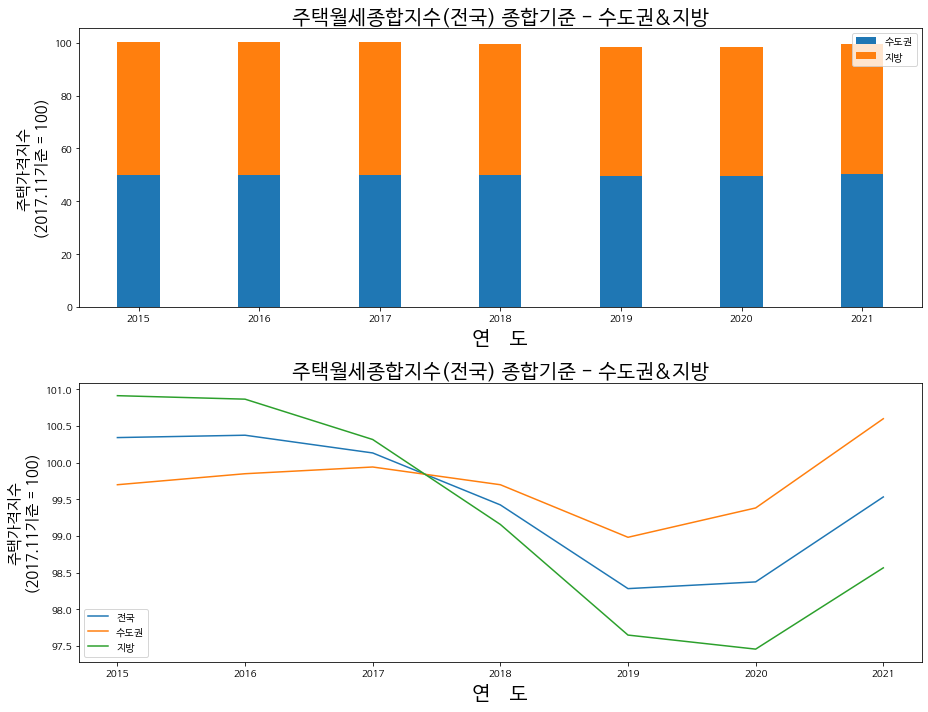

In [10]:
house(MR)

## 인사이트 정리
### 1.2015~ 2021년도까지의 주택월세종합지수에서 수도권과 지방의 비율은 일정하게 유지되어 왔다.
### 2.2015~ 2021년도까지의 주택월세종합지수에서 수도권과 지방 모두 비슷한 양상을 보이고 있다.
### 3.수도권은 2015~ 2017년도, 2019년도에서 상승세를 보이고 있다.
### 4.지방은 2015~2020년까지 하락세를 보이다가 2020년에 상승폭을 보이고 있다.
### 5.전국은 2015~2019년까지 하락세를 보이다가 2020년에 상승폭을 보이고 있다.
### 6. 2019년도에는 수도권은 지수가 상승하지만, 지방은 하락세를 보이고 있다.

<function matplotlib.pyplot.show(*args, **kw)>

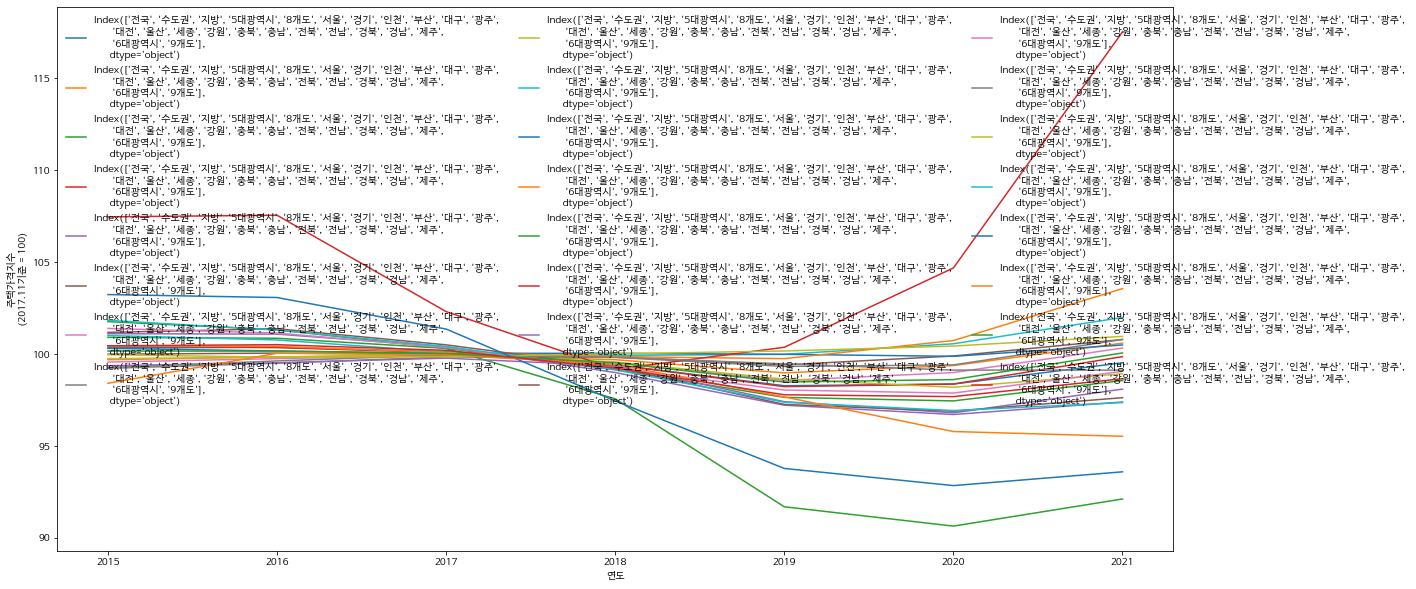

In [11]:
MR_P = slicc(MR, "종합")
plt.figure(figsize=(20,10))
plt.plot(MR_P.index, MR_P, label = MR_P.columns)
plt.xlabel("연도")
plt.ylabel("주택가격지수\n(2017.11기준 = 100)")
plt.legend(loc = "upper left", frameon=False, ncol = 3)
plt.show

## 인사이트 정리
### 7. 현재 주택월세종합지수가 가장 큰폭으로 상승한 곳은 세종시이다. 
### 8. 현재 주택월세종합지수가 가장 큰폭으로 하락한 곳은 경상남도 다음으로 제주이다.

In [12]:
sliccc(MR,"세종")

,종합-세종,아파트-세종,연립다세대-세종,단독주택-세종
2015,107.471429,110.257143,101.457143,99.528571
2016,107.558333,110.483333,100.783333,99.483333
2017,102.316667,103.225000,100.150000,99.800000
2018,99.175000,98.800000,99.791667,100.308333
2019,100.375000,100.483333,98.858333,100.233333
2020,104.691667,105.858333,98.258333,100.150000
2021,117.533333,121.933333,98.366667,100.600000


In [13]:
def house2 (a, b = "전국") :
    MR_L = sliccc(a, b)
    x1 = MR_L.index
    width = 0.35

    f, ax = plt.subplots(2,1, figsize=(13,10))
    ax[0].bar(x1, MR_L['아파트-' + b].values/3, width, label = "아파트")
    ax[0].bar(x1, MR_L['연립다세대-' + b].values/3, width, label = "연립다세대",
              bottom=MR_L['아파트-' + b].values/3)
    ax[0].bar(x1, MR_L['단독주택-' + b].values/3, width, label = "단독주택", 
              bottom=(MR_L['연립다세대-' + b].values+MR_L['아파트-' + b].values)/3)
    ax[1].plot(x1, MR_L['아파트-' + b].values, label = "아파트")
    ax[1].plot(x1, MR_L['연립다세대-' + b].values, label = "연립다세대")
    ax[1].plot(x1, MR_L['단독주택-' + b].values, label = "단독주택")


    ax[0].set_xlabel("연\t도", fontsize = 20)
    ax[0].set_ylabel("주택가격지수\n(2017.11기준 = 100)", fontsize = 15)
    ax[0].legend()
    ax[0].set_title("주택월세종합지수("+ b +") 주택유형에 따라서", fontsize = 20)
    ax[1].set_xlabel("연\t도", fontsize = 20)
    ax[1].set_ylabel("주택가격지수\n(2017.11기준 = 100)", fontsize = 15)
    ax[1].set_title("주택월세종합지수("+ b +") 주택유형에 따라서", fontsize = 20)
    ax[1].legend()

    plt.tight_layout()
    plt.show

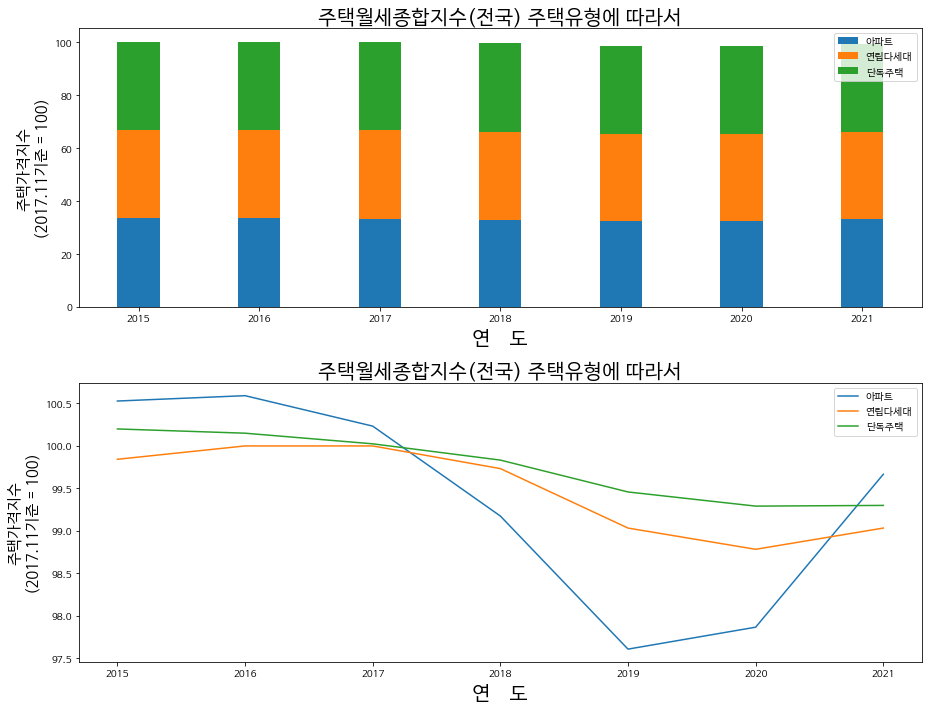

In [14]:
house2(MR)

## 인사이트 정리
### 7. 2015~2021년동안 전국의 아파트, 연립다세대 와 단독주택의 월세지수는 비슷하다.
### 8. 차이를 아래그래프를 통해 보자면 아파트는 2019년까지 하락하다가 21019년을 기준으로 반등한다.
### 9. 연립다세대와 단독주택은 지속해서 감소중이다.

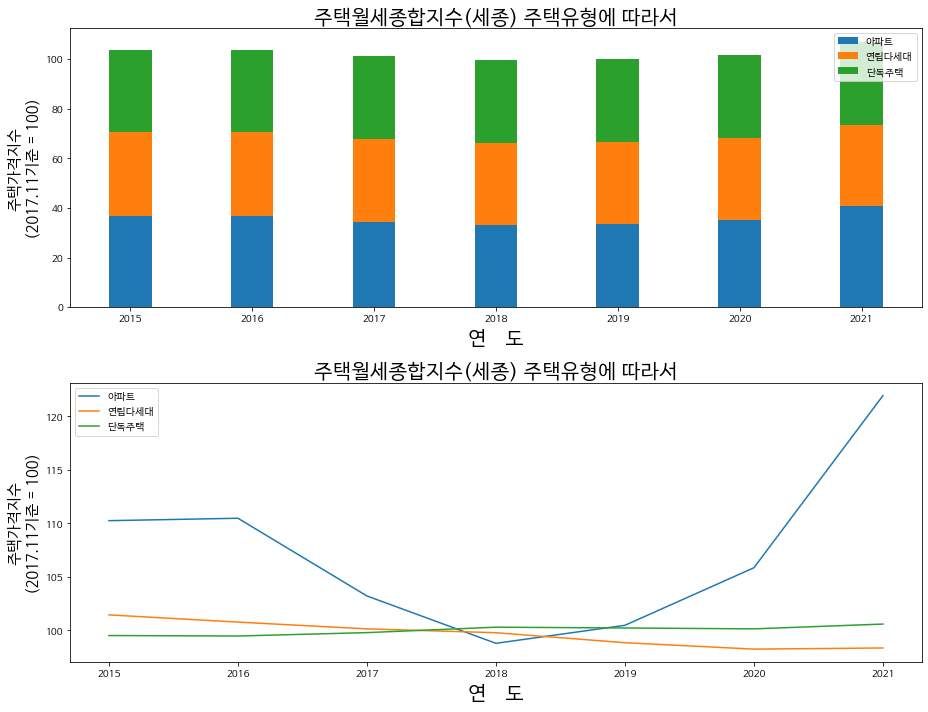

In [15]:
house2(MR,"세종")

## 인사이트 정리 - 세종시(현재 가장 높은 추세를 보이기 때문에)
### 10. 세종시의 아파트 월세 지수는 2018년까지 하락하다가 반등을 보이고 가파르게 상승하고 있다.
### 11. 연립다세대와 단독주택은 변동이 거의 없다.
### 12.  세종시가 주택월세가격지수가 높은 이유는 아파트의 월세가격지수 때문이다.

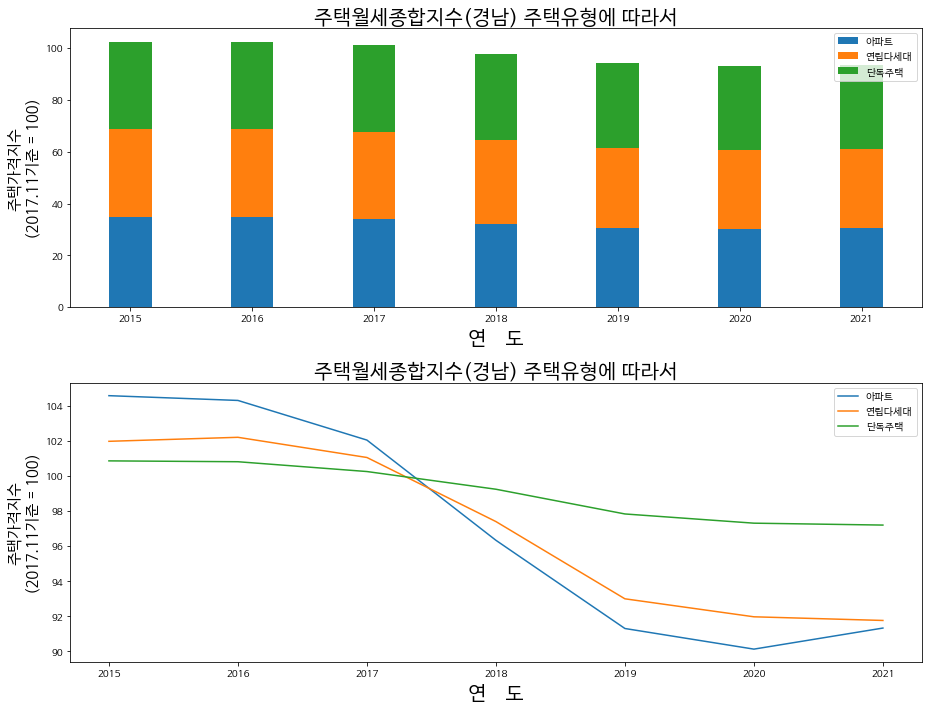

In [16]:
house2(MR,"경남")

## 인사이트 정리 - 경상남도(현재 가장 낮은 추세를 보이기 때문에)
### 13. 경상남도의 아파트와 연립다세대의 지수는 같은 추세로 지속적으로 하락중이다.
### 14. 경상남도 아파트의 주택월세가격지수는 2020년도를 기준으로 반등한다.
### 15. 단독주택은 아파트와 연립다세대에 비해 천천히 하락하고 있다.

#  대한민국 지도로 주택월세종합지수 확인하기

In [17]:
# 지도 위에 표시하기
def geowrite (a,b,c) :
    f = a.plot(cmap='Blues',column=c, edgecolor="w", figsize=(15,15),vmin=95,vmax=110, legend=True)
    f.set_title(b + "\n주택월세종합지수 구역도\n[2017.11.01 = 100]기준")
    f.set_axis_off()
    plt.show()

In [18]:
korea_merged, category = slic(MR, "종합", map_k)
korea_merged

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,2015,2016,2017,2018,2019,2020,2021
0,42,Gangwon-do,강원도,"MULTIPOLYGON (((1163759.191 1909653.101, 11637...",99.371429,99.533333,99.783333,99.366667,97.416667,96.808333,98.100000
1,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",99.571429,99.758333,99.925000,99.541667,98.566667,99.000000,100.333333
2,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((1053643.218 1612344.022, 10536...",103.242857,103.083333,101.366667,97.458333,93.783333,92.850000,93.600000
3,47,Gyeongsangbuk-do,경상북도,"MULTIPOLYGON (((1171290.353 1782200.848, 11712...",101.842857,101.308333,100.416667,99.150000,97.383333,96.933333,97.366667
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1...",100.314286,100.175000,100.041667,100.050000,99.991667,99.883333,100.500000
5,27,Daegu,대구광역시,"POLYGON ((1107777.593 1780522.269, 1107845.409...",101.014286,100.775000,100.108333,99.933333,99.991667,100.566667,102.000000
6,30,Daejeon,대전광역시,"POLYGON ((990946.725 1832389.260, 991057.692 1...",100.442857,100.425000,100.091667,99.866667,99.758333,100.741667,103.566667
7,26,Busan,부산광역시,"MULTIPOLYGON (((1137080.579 1677826.696, 11370...",99.757143,99.841667,100.025000,99.575000,98.641667,98.200000,98.933333
8,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1...",100.000000,100.058333,100.000000,99.858333,99.416667,99.900000,100.800000
9,36,Sejong-si,세종특별자치시,"POLYGON ((971235.936 1844386.985, 971234.055 1...",107.471429,107.558333,102.316667,99.175000,100.375000,104.691667,117.533333


In [19]:
korea_merged["CTP_KOR_NM"].values

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

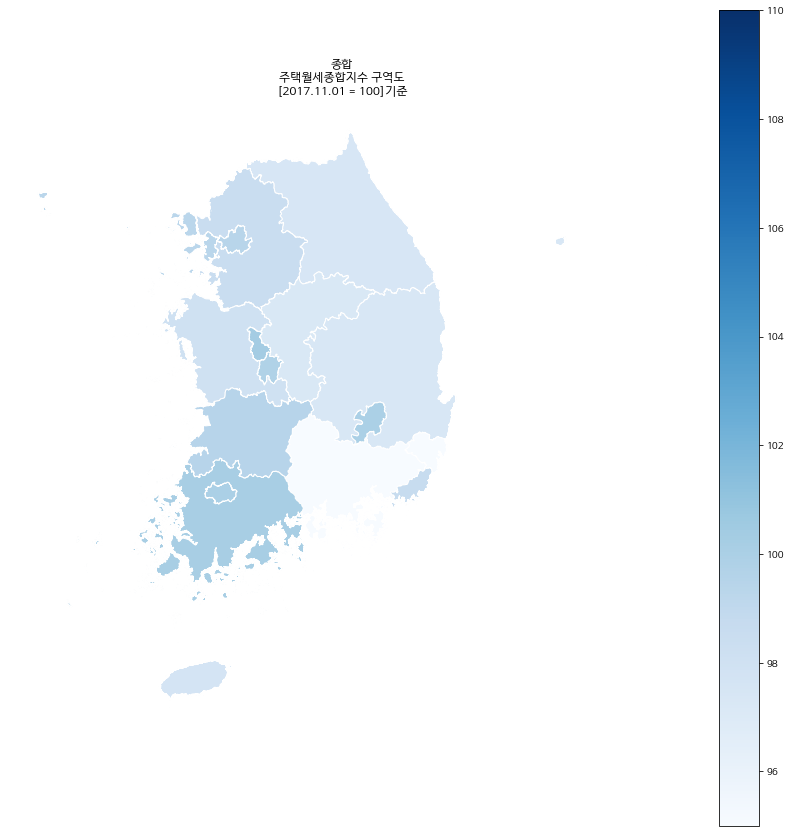

In [20]:
geowrite(korea_merged, category, "2019")

## 인사이트 정리
### 9. 지도로 세종시와 경남이 어느정도 차이가 나고 부분적으로 상승한 부분을 시각적으로 확인해보자. 